In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import matplotlib.cm

In [14]:
import matplotlib
matplotlib.rcParams['mathtext.default'] = 'regular'

In [15]:
# name of the file containing the data in .csv format
data_file = '/home/elco/python_scripts/beo/model_output/model_params_and_results_3_runs_beowawe_12-7-2018.csv'

# name of the index column:
index_column = 'row'

read the datafile:

In [16]:
# read the datafile using pandas:
df = pd.read_csv(data_file)
df = df.set_index(index_column)

parameters for 2d scatter plot

In [17]:
x_col = 'runtime_yr'
y_cols = ['MAE_temperature_85-18', 'mswd_AHe_samples']

filename_add = '_model_error'

x_label = 'Duration (yr)'
degree_symbol = chr(176)
y_labels = ['MAE temperature (%sC)' % degree_symbol, 'MSWD AHe ages']

figsize = (8, 4)
color = 'gray'
size = 50

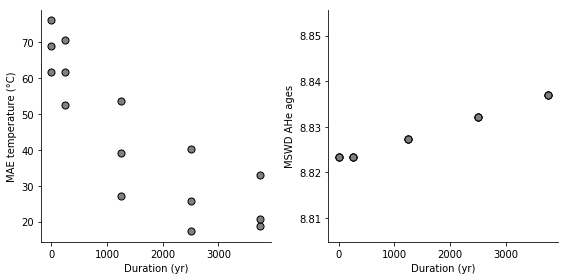

In [19]:
dfn = df.dropna(subset=[x_col]+y_cols)

fig, axs = pl.subplots(1, 2, figsize=figsize)

for ax, y_col, y_label in zip(axs, y_cols, y_labels):
    ax.scatter(dfn[x_col], dfn[y_col], color=color, edgecolor='black', s=size)

    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

fig.tight_layout()

In [ ]:
fn = data_file[:-4] + filename_add + '.pdf'
print('saving figure as %s' % fn)
fig.savefig(fn)